<a href="https://colab.research.google.com/github/vivekram17/Image-Recognition/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vivekram123","key":"ce4c34628193611ca2a34b5986f00531"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape : {x_train.shape}, Test shape : {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape : (60000, 28, 28), Test shape : (10000, 28, 28)


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"train reshaped : {x_train.shape}")

train reshaped : (60000, 28, 28, 1)


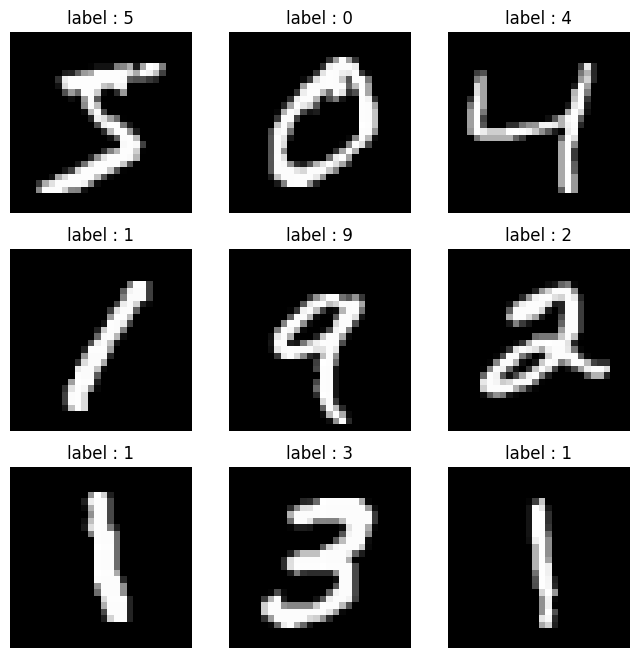

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap = "gray")
  plt.title(f"label : {y_train[i]}")
  plt.axis("off")
plt.show()

In [9]:
(x_train_c10, y_train_c10),(x_test_c10 ,y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR 10 train shape : {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR 10 train shape : (50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

# Define a Sequential model for MNIST
model = Sequential([
    # Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
    Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1)),
    # Add a max pooling layer with a 2x2 pool size
    MaxPooling2D(2,2),
    # Add another 2D convolutional layer with 64 filters and ReLU activation
    Conv2D(64,(3,3), activation = "relu"),
    # Add another max pooling layer with a 2x2 pool size
    MaxPooling2D(2,2),
    # Flatten the output from the convolutional layers
    Flatten(),
    # Add a dense layer with 128 units and ReLU activation
    Dense(128,activation = "relu"),
    # Add the output dense layer with 10 units (for 10 classes) and softmax activation
    Dense(10,activation = "softmax")
])

# Compile the model
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",
              metrics =["accuracy"])

# Print a summary of the model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8984 - loss: 0.3340 - val_accuracy: 0.9843 - val_loss: 0.0551
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9854 - val_loss: 0.0495
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9904 - loss: 0.0311 - val_accuracy: 0.9837 - val_loss: 0.0568
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.9893 - val_loss: 0.0402
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9886 - val_loss: 0.0437


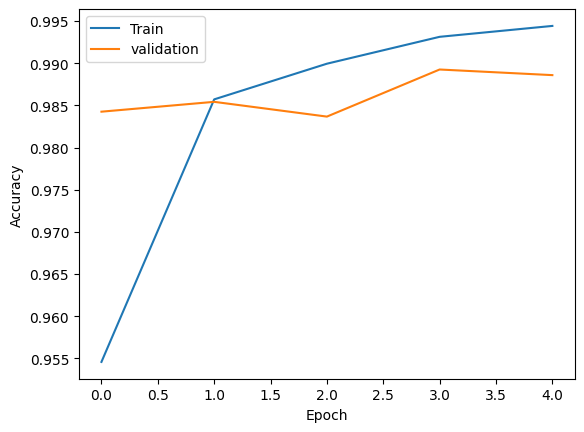

In [12]:
plt.plot(history.history["accuracy"],label = "Train")
plt.plot(history.history["val_accuracy"],label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test Accuracy : {test_acc:.4f}")
y_pred = model.predict(x_test).argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9851 - loss: 0.0489
Test Accuracy : 0.9883
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

# Define a Sequential model with Dropout for regularization
model = Sequential([
    # Add a 2D convolutional layer
    Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1)),
    # Add a max pooling layer
    MaxPooling2D(2,2),
    # Add a Dropout layer with a dropout rate of 0.25
    Dropout(0.25),
    # Add another 2D convolutional layer
    Conv2D(64,(3,3), activation = "relu"),
    # Add another max pooling layer
    MaxPooling2D(2,2),
    # Flatten the output
    Flatten(),
    # Add a dense layer
    Dense(128,activation = "relu"),
    # Add the output dense layer
    Dense(10,activation = "softmax")
])

# Compile the model
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",
              metrics =["accuracy"])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range = 15 ,      # Rotate images by up to 15 degrees
    width_shift_range = 0.1,   # Shift images horizontally by up to 10%
    height_shift_range = 0.1,  # Shift images vertically by up to 10%
    horizontal_flip = True     # Randomly flip images horizontally
)

# Fit the data generator to the CIFAR-10 training data
datagen.fit(x_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

# Define a Sequential model for CIFAR-10 with Batch Normalization and Dropout
model = Sequential([
    # Add a 2D convolutional layer
    Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)),
    # Add a Batch Normalization layer
    BatchNormalization(),
    # Add a max pooling layer
    MaxPooling2D(2,2),
    # Add another 2D convolutional layer
    Conv2D(64,(3,3), activation = "relu"),
    # Add another max pooling layer
    MaxPooling2D(2,2),
    # Add a third 2D convolutional layer
    Conv2D(128,(3,3), activation = "relu"),
    # Flatten the output
    Flatten(),
    # Add a dense layer
    Dense(256,activation = "relu"),
    # Add a Dropout layer
    Dropout(0.5),
    # Add the output dense layer
    Dense(10,activation = "softmax")
    ])

# Compile the model
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

# Train the model using the augmented data generator and validate on the test data
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,
          validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 78ms/step - accuracy: 0.3585 - loss: 1.7534 - val_accuracy: 0.5526 - val_loss: 1.2460
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5328 - loss: 1.3159 - val_accuracy: 0.5413 - val_loss: 1.3444
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.5817 - loss: 1.1889 - val_accuracy: 0.5736 - val_loss: 1.2737
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6057 - loss: 1.1234 - val_accuracy: 0.6106 - val_loss: 1.1303
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6315 - loss: 1.0571 - val_accuracy: 0.6760 - val_loss: 0.9589
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6402 - loss: 1.0342 - val_accuracy: 0.6648 - val_loss: 0.9661
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6510 - loss: 0.9999 - val_accuracy: 0.6558 - val_loss: 1.0586
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.6653 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      1000
           1       0.88      0.79      0.83      1000
           2       0.74      0.46      0.57      1000
           3       0.65      0.29      0.40      1000
           4       0.63      0.69      0.66      1000
           5       0.72      0.52      0.60      1000
           6       0.61      0.86      0.72      1000
           7       0.63      0.82      0.71      1000
           8       0.86      0.78      0.82      1000
           9       0.62      0.93      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.68     10000
weighted avg       0.71      0.69      0.68     10000



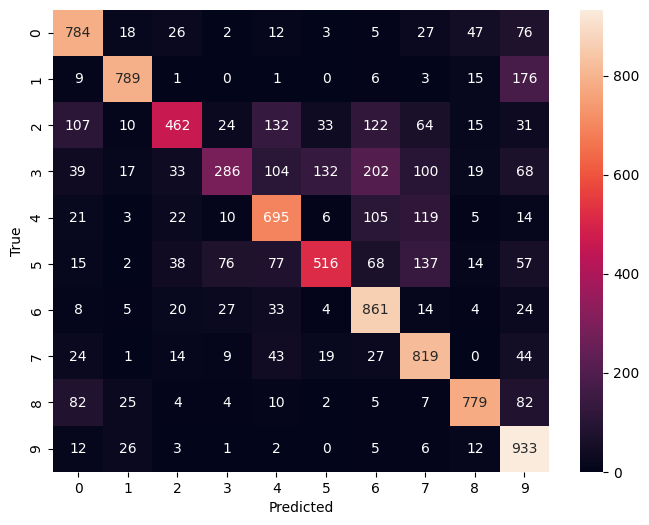

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10 = model.predict(x_test_c10).argmax(axis = 1)
cm = confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

MobileNetV23,RestNet,VGG,ImageNet are example of the pretrained models

In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 75% 164M/218M [00:00<00:00, 592MB/s] 
100% 218M/218M [00:00<00:00, 328MB/s]


In [19]:
import zipfile
with zipfile.ZipFile("/content/cat-and-dog.zip",'r') as zip_ref:
  zip_ref.extractall("/content/dogs-vs-cats")

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for the Cats vs. Dogs dataset with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to the range [0, 1]
    validation_split=0.2,   # Set aside 20% of the data for validation
    rotation_range=20,      # Increased rotation by up to 20 degrees
    width_shift_range=0.2,  # Increased width shift by up to 20%
    height_shift_range=0.2, # Increased height shift by up to 20%
    shear_range=0.2,        # Apply shear transformations
    zoom_range=0.2,         # Apply zoom transformations
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill mode for new pixels created by transformations
)

# Create a training data generator from the directory
train_generator = datagen.flow_from_directory('/content/dogs-vs-cats',
                  target_size=(224,224), # Resize images to 224x224
                  batch_size = 32,       # Use a batch size of 32
                  class_mode='binary',   # Set class mode to binary for binary classification
                  subset='training')     # Specify this is the training subset

# Create a validation data generator from the directory
val_generator = datagen.flow_from_directory('/content/dogs-vs-cats',
                  target_size=(224,224), # Resize images to 224x224
                  batch_size = 32,       # Use a batch size of 32
                  class_mode='binary',   # Set class mode to binary for binary classification
                  subset='validation')   # Specify this is the validation subset

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

# Load the pre-trained MobileNetV2 model with weights from ImageNet
base_model = MobileNetV2(weights="imagenet",include_top = False ,input_shape=(224,224,3))

# Freeze the weights of the base model
base_model.trainable = False

# Create a Sequential model by adding a Global Average Pooling layer and dense layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Add a Global Average Pooling layer
    Dense(128,activation='relu'), # Add a dense layer with ReLU activation
    Dense(1,activation='sigmoid')  # Add the output dense layer with sigmoid activation for binary classification
    ])

# Compile the model
model.compile(optimizer = 'adam' , loss='binary_crossentropy',metrics=['accuracy'])

# Train the model with the frozen base model
model.fit(train_generator,epochs=10,validation_data=val_generator) # Increased epochs to 10

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.7937 - loss: 0.5375 - val_accuracy: 0.7985 - val_loss: 0.5103
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.7990 - loss: 0.4956 - val_accuracy: 0.7985 - val_loss: 0.5201
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.8007 - loss: 0.4837 - val_accuracy: 0.7985 - val_loss: 0.5210
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.8034 - loss: 0.4640 - val_accuracy: 0.7975 - val_loss: 0.5214
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.8022 - loss: 0.4449 - val_accuracy: 0.7970 - val_loss: 0.5327


In [22]:
import tensorflow as tf

# Unfreeze the weights of the base model for fine-tuning
base_model.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer = tf.keras.optimizers.Adam(1e-5), # Use Adam optimizer with a low learning rate
              loss = 'binary_crossentropy',           # Use binary crossentropy loss
              metrics=['accuracy']                    # Include accuracy as a metric
              )

# Continue training the model with the unfrozen base model
model.fit(train_generator,epochs=10,validation_data = val_generator) # Increased epochs to 10

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1863s 7s/step - accuracy: 0.8028 - loss: 0.4781 - val_accuracy: 0.7960 - val_loss: 0.5343
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1757s 7s/step - accuracy: 0.8111 - loss: 0.4344 - val_accuracy: 0.7955 - val_loss: 0.5340
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1797s 7s/step - accuracy: 0.8004 - loss: 0.4215 - val_accuracy: 0.7920 - val_loss: 0.5367


In [23]:
model.save('Mobilenet_cats_dogs.h5')
#To Load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('Mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step


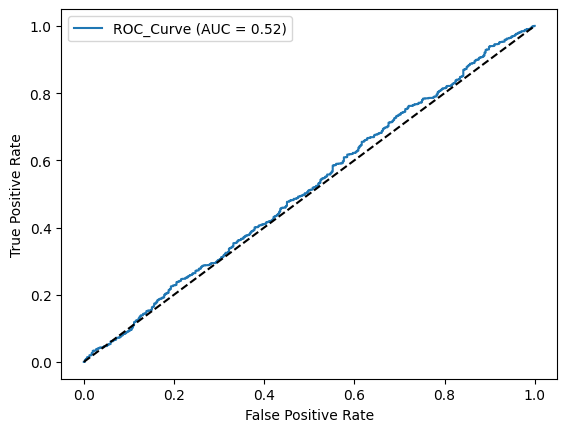

In [24]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = loaded_model.predict(val_generator)
fpr,tpr,_ = roc_curve(val_generator.classes,y_pred_proba)

roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'ROC_Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [29]:
from google.colab import files
uploaded = files.upload()  # Upload your image file

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for displaying the image

# Get the filename of the uploaded image
for fn in uploaded.keys():
  img_path = '/content/' + fn

# Load the image and resize it to the target size
img = image.load_img(img_path, target_size=(224, 224))

# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions of the array to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for the MobileNetV2 model
img_array = preprocess_input(img_array)

# Make a prediction using the loaded model
prediction = loaded_model.predict(img_array)

# Print the predicted class based on the prediction score
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving Dogpic.jpg to Dogpic (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted class: Dog


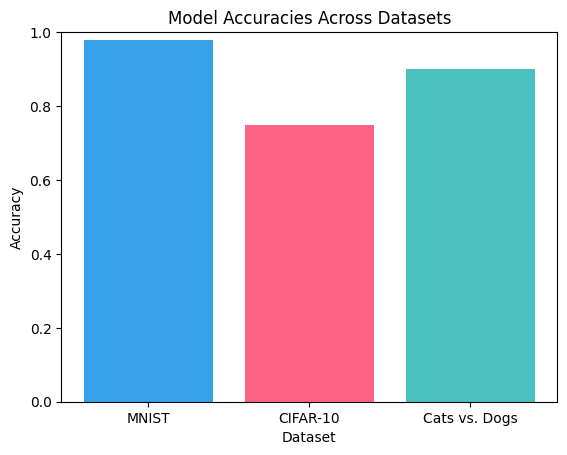

In [30]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()